# 作業

實作各種不一樣的方式來調整飽和 / 對比 / 明亮

1. 改變 color space 來調整飽和度
2. 實作直方圖均衡
3. alpha/ beta 調整對比 / 明亮

In [1]:
from google.colab import drive   
drive.mount('/content/gdrive')  # change working path of google colab

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
path = "/content/gdrive/My Drive/Colab Notebooks/20191119_D001Q1"
import os
os.chdir(path)
!ls   #確認path已經到local目錄

Day001_read_image_HW.ipynb		Day003_color_spave_op_HW.ipynb
Day001_read_image_Sample.ipynb		Day003_color_spave_op_Sample.ipynb
Day002_change_color_space_HW.ipynb	Part01
Day002_change_color_space_Sample.ipynb


In [24]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

(3216, 2000, 3)

In [36]:
img_path = 'Part01/GF_4.jpg'

# 以彩色圖片的方式載入
img = cv2.imread(img_path, cv2.IMREAD_COLOR)
img.shape

(3216, 2000, 3)

## 改變飽和度

- 轉換成 HSV color space, 改變 s channel 的值

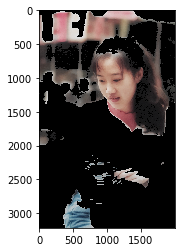

In [61]:
# 為了要改變飽和度，我們先把 color space 轉成 HSV 格式
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
change_percentage = 0.2

# 針對飽和度的值做改變，超過界線 0~1 的都會 bound
# 在 HSV color space 減少飽和度
img_hsv_down = img_hsv.astype('float32')
img_hsv_down[..., 1] = img_hsv_down[..., 1]/255 - change_percentage
img_hsv_down[img_hsv_down[...,1] < 0] = 0
img_hsv_down[..., 1] = img_hsv_down[..., 1]*255
img_hsv_down = img_hsv_down.astype('uint8')

img_rgb_down = cv2.cvtColor(img_hsv_down, cv2.COLOR_HSV2RGB)
plt.imshow(img_rgb_down)

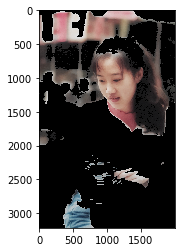

In [62]:
# 在 HSV color space 增加飽和度
img_hsv_up = img_hsv.astype('float32')
img_hsv_up[..., 1] = img_hsv_up[..., 1]/255 + change_percentage
img_hsv_up[img_hsv_up[...,1] > 1] = 1
img_hsv_up[..., 1] = img_hsv_up[..., 1]*255
img_hsv_up = img_hsv_down.astype('uint8')

img_rgb_up = cv2.cvtColor(img_hsv_up, cv2.COLOR_HSV2RGB)
plt.imshow(img_rgb_up)

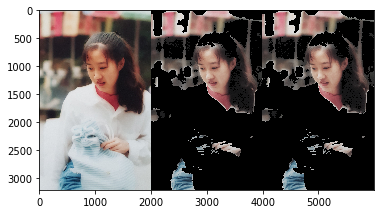

In [63]:
# 組合圖片 + 顯示圖片
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv_change = np.hstack((img_rgb, img_rgb_down, img_rgb_up))
plt.imshow(img_hsv_change)

## 直方圖均衡

1. case 1: 把彩圖拆開對每個 channel 個別做直方圖均衡再組合起來
2. case 2: 轉換 color space 到 HSV 之後對其中一個 channel 做直方圖均衡

In [42]:
# case 1
# 每個 channel 個別做直方圖均衡
b, g, r = cv2.split(img)
equalHist_b = cv2.equalizeHist(b)
equalHist_g = cv2.equalizeHist(g)
equalHist_r = cv2.equalizeHist(r)
equalHist_b.shape

(3216, 2000)

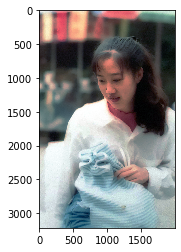

In [59]:
equalHist_by_channel = np.zeros(img.shape[:3],dtype="uint8");
equalHist_by_channel=cv2.merge([equalHist_r,equalHist_g,equalHist_b])
img_rgb_equal = equalHist_by_channel
plt.imshow(img_rgb_equal)

In [66]:
# case 2 - 轉換 color space 後只對其中一個 channel 做直方圖均衡
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#img_hsv_equal = [img_hsv[...,0:2], cv2.equalizeHist(img_hsv[...,-1])]
img_hsv_equal =cv2.merge([img_hsv[...,0:2], cv2.equalizeHist(img_hsv[...,-1])])
img_hsv_equal.shape

(3216, 2000, 3)

In [0]:
img_hsv_equal = cv2.cvtColor(img_hsv_equal, cv2.COLOR_HSV2RGB)

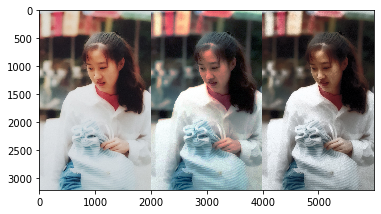

In [69]:
# 組合經過直方圖均衡的每個 channel
 # 組合圖片 + 顯示圖片
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_rgb_equalHist = np.hstack((img_rgb, img_rgb_equal, img_hsv_equal))
plt.imshow(img_rgb_equalHist)

## 調整對比 / 明亮

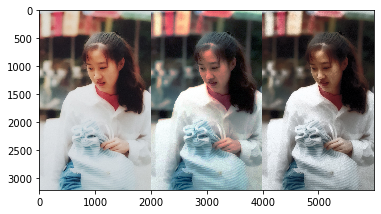

In [71]:
# alpha: 控制對比度 (1.0~3.0)
# beta: 控制明亮度 (0~255)
add_contrast = cv2.convertScaleAbs(img, alpha=1.5, beta=0)
add_lighness = cv2.convertScaleAbs(img, alpha=1.0, beta=30)

add_contrast_rgb = cv2.cvtColor(add_contrast, cv2.COLOR_BGR2RGB)
add_lighness_rgb = cv2.cvtColor(add_lighness, cv2.COLOR_BGR2RGB)
# 組合圖片 + 顯示圖片
img_contrast_light = np.hstack((img_rgb, add_contrast_rgb, add_lighness_rgb))
plt.imshow(img_rgb_equalHist)
